# K Nearest Neighbor Classification On IRIS Dataset

### Importing the required libraries and Reading the dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
iris=pd.read_csv('iris.csv')

In [3]:
# To get the first 5 rows of the dataset  
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# checking the number of values of target variable  iris['Species'].value_counts()
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
# to get some more info about the data 
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Cheching the null values 
iris.notnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
145,True,True,True,True,True,True
146,True,True,True,True,True,True
147,True,True,True,True,True,True
148,True,True,True,True,True,True


In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# Removing the unnecessary column 
iris.pop('Id')

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [10]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Dividing the dataset into features and target columns

In [11]:
X=iris.iloc[:,:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y = iris.iloc[:,-1:]
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


### Data Preprocessing  

In [13]:
#data Normalization
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)

In [14]:
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

### Spliting the dataset 

In [15]:
#Train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
y_test.shape

(45, 1)

### Applying the model 

In [17]:
#Training and Predicting
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 3)
knnmodel.fit(X_train,y_train)
ypredict = knnmodel.predict(X_test)

### Checking the Accuracy

In [18]:
#Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,ypredict)
acc

0.9777777777777777

### Confusion Matrix 

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypredict)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [20]:
cm1 = pd.DataFrame(data=cm,index=['setosa','Versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,14,0,0
Versicolor,0,18,0
virginica,0,1,12


In [21]:
#output visualization
prediction_output =pd.DataFrame(data=[y_test.values,ypredict],index=['y_test','ypredict'])

In [22]:
prediction_output.transpose()

,y_test,ypredict
0,"[[Iris-setosa], [Iris-versicolor], [Iris-versi...","[Iris-setosa, Iris-versicolor, Iris-versicolor..."


### To find the optimal value of K

In [23]:
#Finding the values of k
ks =21
mean_acc = np.zeros((ks-1))

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)
    

In [24]:
print(mean_acc)

[0.95555556 0.95555556 0.97777778 0.95555556 0.95555556 0.97777778
 0.97777778 0.97777778 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.93333333 0.93333333
 0.93333333 0.95555556]


In [25]:
print("The best accuracy was with",mean_acc.max(),"with k=",mean_acc.argmax()+1)

The best accuracy was with 0.9777777777777777 with k= 3


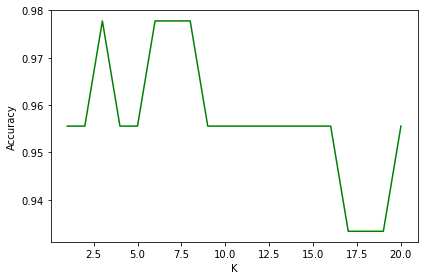

In [26]:
plt.plot(range(1,ks),mean_acc,'g')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.tight_layout()
plt.show()

## Conclusion 

### We have sucessfully applied the KNN model on Iris Dataset the accuray we got is 97.77 % and the optimal value of K is 3  